In [1]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.dc import DC
from nanodrivers.visa_drivers.signal_analyser import Anri

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat, loadmat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_9'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9 already exists


In [2]:
dc = SIM(slot_num=7)
dc.idn()

Unable to connect device.
 VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Check that device is connected, visible in NI MAX and is not used by another software.
Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7



In [3]:
dc.disconnect()

SIM928 is now disconnected from SIM900 mainframe


In [4]:
dc = SIM(slot_num=7)
dc.idn()

Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7



In [5]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,1.0.7



In [6]:
sa = Anri('TCPIP::169.254.36.112::INSTR')
print(sa.idn())

def set_cent_freq_(sa, freq): 
    sa.write('FREQuency:CENTer {} MHz'.format(freq/1e6))
    
    
def set_span_(sa, span):
    sa.write('FREQ:SPAN {}'.format(span))
    
def set_band_(sa, band):
    sa.write('BAND {}KHZ'.format(str(band)))
    
def get_freq_(sa):
    nop = int(sa.query('SWEep:POINts?'))
    start_fr = sa.query_float('FREQuency:STARt?')
    stop_fr = sa.query_float('FREQuency:STOP?')
    return np.linspace(start_fr, stop_fr, nop)

def get_data_(sa): 
    sa.write('INIT:IMM')
    time.sleep(20 + sa.query_float('SWEep:TIME?'))
    raw_data = sa.query('TRAC:DATA? TRACE1')
    return np.array(raw_data.split(','), dtype=float)

Connection exist: Rohde&Schwarz,FPL1026,1304.0004K26/200025,2.10SP1

None


In [7]:
path = adress +'\\'+ 'IM_low_noise_9'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\IM_low_noise_9 created!


In [9]:
low_noise_pump_freq = 5e9

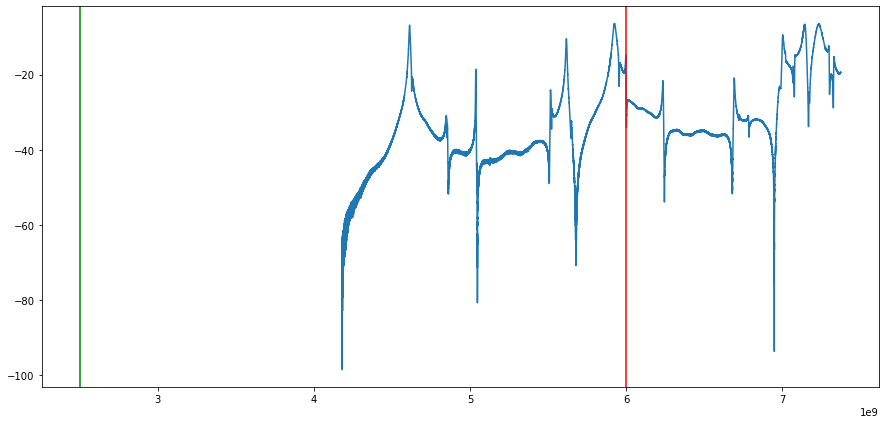

In [10]:
file_name = adress +'\\'+ 'IM' + '\\' + 'BP_filter_scan_4.614.mat'
mat_low19 = loadmat(file_name)
freq_bp = mat_low19['freq'][0]
mag_bp = mat_low19['mag'][0]
pha_bp = mat_low19['pha'][0]

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(freq_bp[4000:-25000], mag_bp[4000:-25000])
# ax.plot(freq_bp, mag_bp)
ax.axvline(low_noise_pump_freq/2,  color = 'g')
ax.axvline(6e9, color = 'r')